<a href="https://colab.research.google.com/github/Gurjot-Singh-2002/UML501-Lab-Assignments/blob/main/Assignment%208/102203582_3CO14_ODD2024_A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q1

In [12]:
#Step 1: Load the Dataset
import pandas as pd
import numpy as np
import urllib.request

# Download the dataset
url = "https://www.philippe-fournier-viger.com/spmf/datasets/retail.txt"
file_path = "/content/retail.txt"
urllib.request.urlretrieve(url, file_path)

# Load the dataset into a pandas DataFrame
with open(file_path, 'r') as file:
    transactions = [line.strip().split() for line in file.readlines()]

# Display the first few transactions
transactions[:5]

[['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30'],
 ['31', '32', '33'],
 ['34', '35', '36'],
 ['37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47'],
 ['39', '40', '48', '49']]

In [13]:
#Step 2: Preprocess the Data
from mlxtend.preprocessing import TransactionEncoder

# Initialize the transaction encoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the array into a DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows
df.head()

,1,10,100,1000,10000,10001,10002,10003,10004,10005,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#Step 3: Apply the Apriori Algorithm with Varying Minimum Support Counts
from mlxtend.frequent_patterns import apriori

# Define a list of minimum support thresholds
min_supports = [0.01, 0.05, 0.1, 0.2]

# Initialize a dictionary to store frequent itemsets for each support threshold
frequent_itemsets = {}

# Apply the Apriori algorithm for each minimum support threshold
for min_support in min_supports:
    frequent_itemsets[min_support] = apriori(df, min_support=min_support, use_colnames=True)

# Display the frequent itemsets for each support threshold
for min_support, itemsets in frequent_itemsets.items():
    print(f"Frequent Itemsets for min_support={min_support}:")
    print(itemsets)
    print("\n")

Frequent Itemsets for min_support=0.01:
      support           itemsets
0    0.015562               (10)
1    0.012500             (1005)
2    0.025374              (102)
3    0.010004            (10516)
4    0.031692              (111)
..        ...                ...
154  0.013532  (171, 39, 40, 49)
155  0.014020   (33, 39, 40, 49)
156  0.018670   (42, 33, 40, 49)
157  0.012250   (37, 39, 40, 49)
158  0.022583   (42, 39, 40, 49)

[159 rows x 2 columns]


Frequent Itemsets for min_support=0.05:
     support      itemsets
0   0.172036          (33)
1   0.176902          (39)
2   0.574794          (40)
3   0.169517          (42)
4   0.477927          (49)
5   0.050725          (66)
6   0.095903      (33, 40)
7   0.091128      (33, 49)
8   0.117341      (39, 40)
9   0.090107      (39, 49)
10  0.129466      (42, 40)
11  0.330551      (40, 49)
12  0.102289      (42, 49)
13  0.061274  (33, 40, 49)
14  0.069213  (39, 40, 49)
15  0.083551  (42, 40, 49)


Frequent Itemsets for min_support=0.1

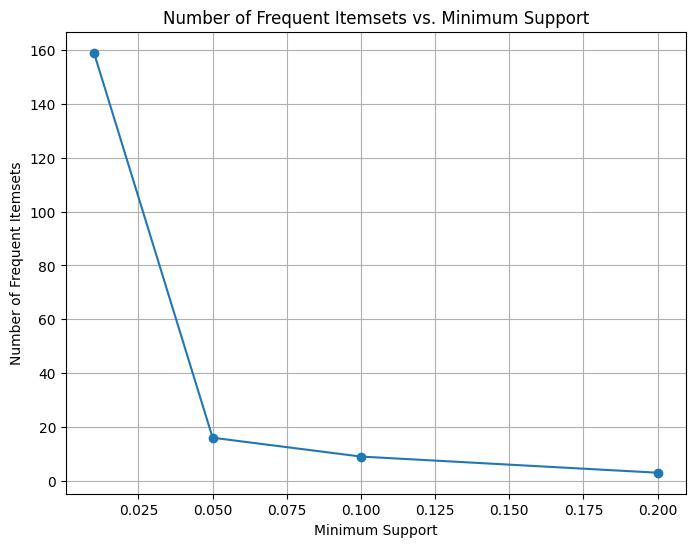

In [15]:
#Step 4: Visualize the Results
import matplotlib.pyplot as plt

# Count the number of frequent itemsets for each support threshold
support_counts = {min_support: len(itemsets) for min_support, itemsets in frequent_itemsets.items()}

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(list(support_counts.keys()), list(support_counts.values()), marker='o')
plt.title('Number of Frequent Itemsets vs. Minimum Support')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Itemsets')
plt.grid(True)
plt.show()

#Q2

In [16]:
# Generate Association Rules with Varying Minimum Confidence
from mlxtend.frequent_patterns import association_rules

# Define a list of minimum confidence thresholds
min_confidences = [0.5, 0.6, 0.7, 0.8]

# Initialize a dictionary to store association rules for each confidence threshold
association_rules_dict = {}

# Generate association rules for each minimum confidence threshold
for min_confidence in min_confidences:
    rules = association_rules(frequent_itemsets[0.01], metric="confidence", min_threshold=min_confidence)
    association_rules_dict[min_confidence] = rules

# Display the association rules for each confidence threshold
for min_confidence, rules in association_rules_dict.items():
    print(f"Association Rules for min_confidence={min_confidence}:")
    print(rules)
    print("\n")


Association Rules for min_confidence=0.5:
      antecedents consequents  antecedent support  consequent support  \
0           (102)        (40)            0.025374            0.574794   
1           (102)        (49)            0.025374            0.477927   
2           (111)        (39)            0.031692            0.176902   
3           (111)        (40)            0.031692            0.574794   
4          (1147)        (40)            0.016175            0.574794   
..            ...         ...                 ...                 ...   
119      (37, 40)    (39, 49)            0.023105            0.090107   
120      (37, 49)    (39, 40)            0.016061            0.117341   
121  (42, 39, 40)        (49)            0.034607            0.477927   
122  (42, 39, 49)        (40)            0.026928            0.574794   
123      (42, 39)    (40, 49)            0.044203            0.330551   

      support  confidence      lift  representativity  leverage  conviction  \
0 

#Q3

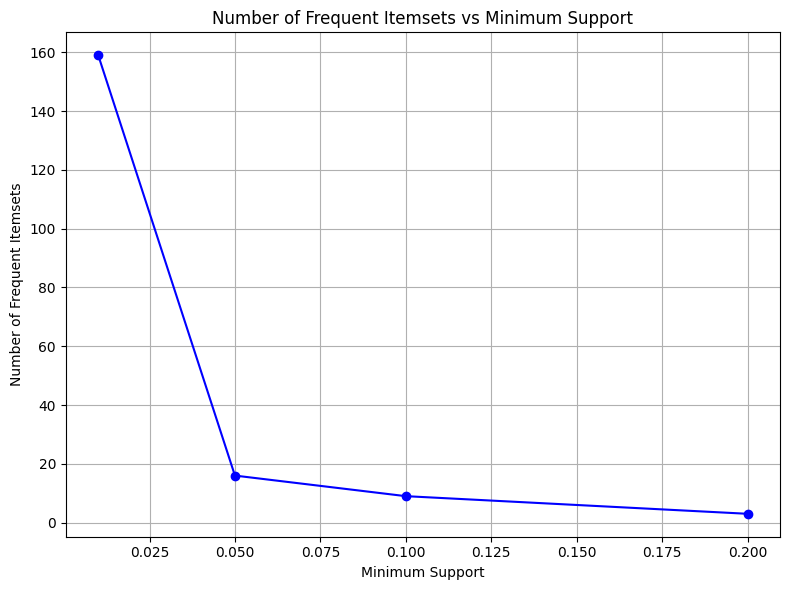

In [17]:
#Step 1: Plot Number of Frequent Itemsets vs Minimum Support
import matplotlib.pyplot as plt

# Prepare data
support_thresholds = list(frequent_itemsets.keys())
frequent_counts = [len(frequent_itemsets[support]) for support in support_thresholds]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(support_thresholds, frequent_counts, marker='o', color='blue')
plt.title("Number of Frequent Itemsets vs Minimum Support")
plt.xlabel("Minimum Support")
plt.ylabel("Number of Frequent Itemsets")
plt.grid(True)
plt.tight_layout()
plt.show()

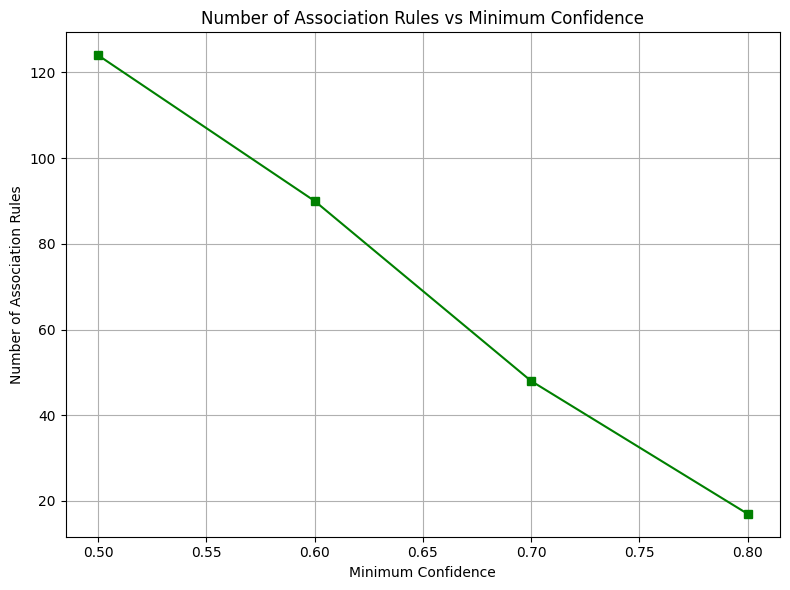

In [20]:
#Step 2: Plot Number of Association Rules vs Minimum Confidence
# Prepare data
confidence_thresholds = list(association_rules_dict.keys())
rules_counts = [len(association_rules_dict[conf]) for conf in confidence_thresholds]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(confidence_thresholds, rules_counts, marker='s', color='green')
plt.title("Number of Association Rules vs Minimum Confidence")
plt.xlabel("Minimum Confidence")
plt.ylabel("Number of Association Rules")
plt.grid(True)
plt.tight_layout()
plt.show()